# Data Science final exam

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

## 1. Numpy exercises
1.1 Generate a random numpy array of size 100, with float values from 0 to 5 

In [2]:
genArray = np.linspace(0,5,100)
genArray.dtype
genArray

array([0.        , 0.05050505, 0.1010101 , 0.15151515, 0.2020202 ,
       0.25252525, 0.3030303 , 0.35353535, 0.4040404 , 0.45454545,
       0.50505051, 0.55555556, 0.60606061, 0.65656566, 0.70707071,
       0.75757576, 0.80808081, 0.85858586, 0.90909091, 0.95959596,
       1.01010101, 1.06060606, 1.11111111, 1.16161616, 1.21212121,
       1.26262626, 1.31313131, 1.36363636, 1.41414141, 1.46464646,
       1.51515152, 1.56565657, 1.61616162, 1.66666667, 1.71717172,
       1.76767677, 1.81818182, 1.86868687, 1.91919192, 1.96969697,
       2.02020202, 2.07070707, 2.12121212, 2.17171717, 2.22222222,
       2.27272727, 2.32323232, 2.37373737, 2.42424242, 2.47474747,
       2.52525253, 2.57575758, 2.62626263, 2.67676768, 2.72727273,
       2.77777778, 2.82828283, 2.87878788, 2.92929293, 2.97979798,
       3.03030303, 3.08080808, 3.13131313, 3.18181818, 3.23232323,
       3.28282828, 3.33333333, 3.38383838, 3.43434343, 3.48484848,
       3.53535354, 3.58585859, 3.63636364, 3.68686869, 3.73737

1.2 using a mask, select values between 1 & 2 and 3 & 4 

In [3]:
val_1_2 = genArray[(genArray>1)& (genArray<2)]
val_3_4 = genArray[(genArray>3)& (genArray<4)]
merged_array = np.concatenate((val_1_2,val_3_4))
merged_array

array([1.01010101, 1.06060606, 1.11111111, 1.16161616, 1.21212121,
       1.26262626, 1.31313131, 1.36363636, 1.41414141, 1.46464646,
       1.51515152, 1.56565657, 1.61616162, 1.66666667, 1.71717172,
       1.76767677, 1.81818182, 1.86868687, 1.91919192, 1.96969697,
       3.03030303, 3.08080808, 3.13131313, 3.18181818, 3.23232323,
       3.28282828, 3.33333333, 3.38383838, 3.43434343, 3.48484848,
       3.53535354, 3.58585859, 3.63636364, 3.68686869, 3.73737374,
       3.78787879, 3.83838384, 3.88888889, 3.93939394, 3.98989899])

1.3 explain why the following lines return an error:<br>
`array = np.arange(20)
array[1]='toto'`

<h5>array = np.arange(20)</h5>
    
    In this line, numpy creates an array by given number.
    In this example 20. So the numpy creates an array with 20 numbers which are started from 1 to 19.
    The problem is, when we created an array with numbers, the data type of array will be int.

<h5>array[1]='toto'</h5>

    And this line, we want to change the second member of array with a 'String' value.
    Thus, the data types can not match. Then it gives an error.
    

1.4 Why origin1[1] & origin2[1] do not have the same value?

`origin1 = np.arange(20)<br>
dest=origin1<br>
dest[1]=100<br>
print("origin1",origin1)<br>
<br>
origin2 = np.arange(20)<br>
value=origin2[1]<br>
value=100<br>
print("origin2",origin2)'




    In the origin 1, we create an array with 20 numbers. Then we create a variable and assign the origin1 to it.
    Thus, the variable called "dest" addresses the same memory which is addressing by origin1.
    Hence, when we changed the second member of dest, it will be changed also in the origin1 because they are adressing the
    same memory for the array.
    In the origin 2, we create an array with 20 numbers. Then we create a variable and give the value of second member of
    array. Then we change the value of the variable "value". Thus, we only change the value. We don't do any changes in 
    the array. Thus, our array remains same.

1.5 modify previous code in order to be able to change values in "dest" without modifying values from "origin1"

In [4]:
origin1 = np.arange(20)
dest = np.copy(origin1)
dest[1] = 100
print("origin1 -> ",origin1)
print("dest ----> ",dest)

origin1 ->  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
dest ---->  [  0 100   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19]


## 2. PySpark exercises
2.1 Explain how spark perform evaluation of the following expression :

the sum of squares :  $$\sum_{i=1}^n x_i^3 $$  

In [5]:
for i=1:n:
    A.map(lambda x: x**3).collect()

SyntaxError: invalid syntax (<ipython-input-5-c35406e4e607>, line 1)

2.2 Write the code to perform the previous evaluation on a RDD with 10000 entries (execution will failed as Spark is not installed)

In [6]:
A = sc.parallelsize(range(10000))

NameError: name 'sc' is not defined

2.3 Define which line of code will take most of the time to be executed, and explain why

    First one will take more time. Because in the first one, we are using all N data in a regular way and we are using one processor to perform this.
    But in the second line code, we are using RDD (Resilient Distributed DataSet) which makes data distributed to all the processors with random sizes and all the processors are working together as parallel.

## 3. Matplotlib exercises 

3.1 Plot $cos(x^2)$ for x in [0:10]    
Adapt the number of points to have a smooth curve

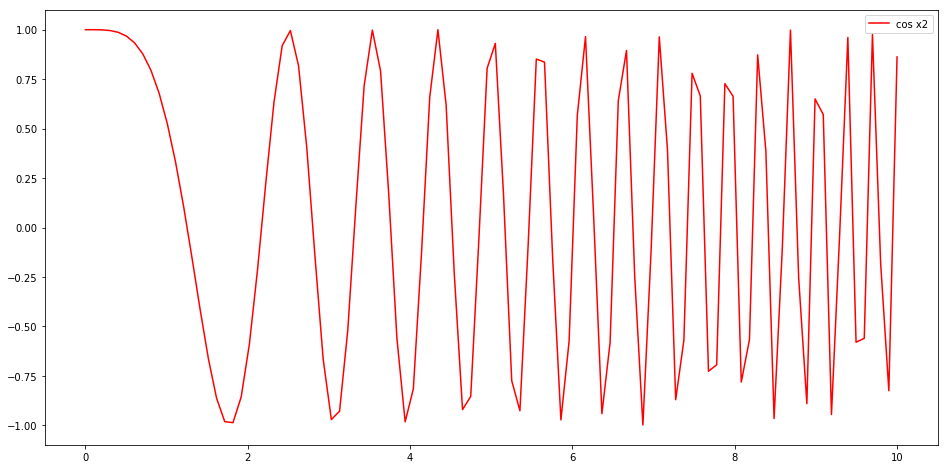

In [7]:
x = np.linspace(0,10,100)
y = np.cos(x*x)

plt.figure(figsize=(16,8))
plt.plot(x,y,'r',label='cos x2')
plt.legend()
plt.show()

3.2 Plot the polynomes $x^i$ for $i$ from 1 to 20 and x in [-1:1]    
- Plot all the polynomes on the same graph.   
- Add a legend for each curve.
- Position the legend outside the plot.
- Increase the size of the figure to see each curve

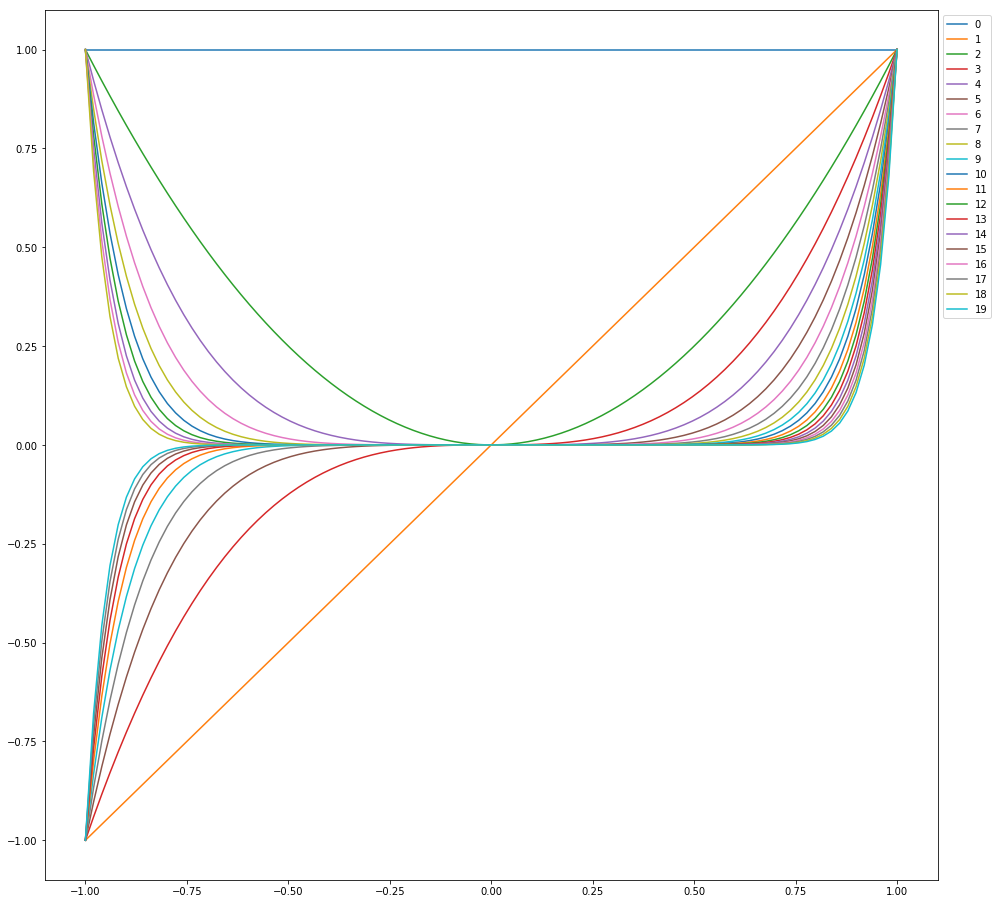

In [8]:
x = np.linspace(-1,1,100)

plt.figure(figsize=(16,16))

for i in range(0,20):
    y = x**i
    plt.plot(x,y,label=(str(i)))
    
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    

3.3 Make a histogram of a normal distribution with $\sigma=3$ and a $mean = 10$
- choose a size large enough to see a smooth distribution with 100 bins

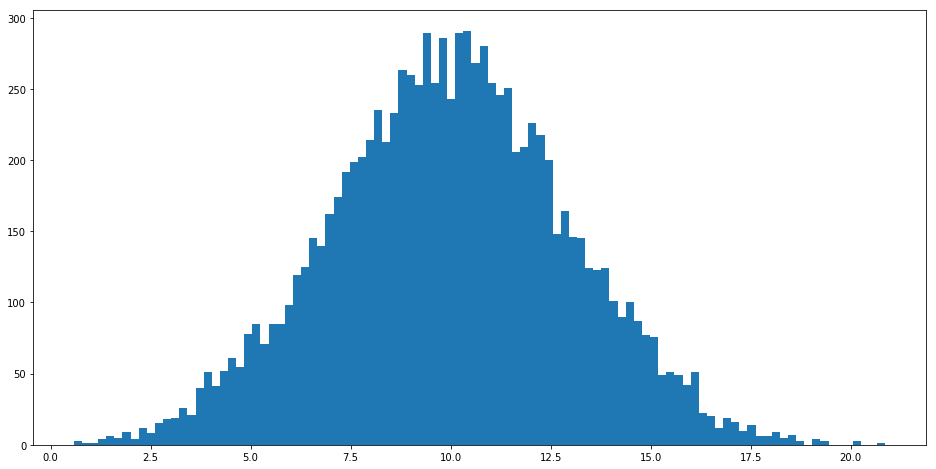

In [9]:
sigma = 3
mean = 10
plt.figure(figsize=(16,8))
normal_dist = np.random.normal(mean,sigma,10000)
plt.hist(normal_dist,bins=100);

## Data mining

For this exercise, we will the Kepler dataset from NASA    
https://catalog.data.gov/dataset/kepler

1. Use `pandas` to load the data from `kepler.csv`

In [10]:
kepler = pd.read_csv('kepler.csv') 

The dataset presents a series detected exoplanets (planets orbiting around stars other than the sun) parameters.

2. Print the list of columns in the dataset

In [11]:
kepler.columns

Index(['# name', 'planet_status', 'mass', 'mass_error_min', 'mass_error_max',
       'mass_sini', 'mass_sini_error_min', 'mass_sini_error_max', 'radius',
       'radius_error_min', 'radius_error_max', 'orbital_period',
       'orbital_period_error_min', 'orbital_period_error_max',
       'semi_major_axis', 'semi_major_axis_error_min',
       'semi_major_axis_error_max', 'eccentricity', 'eccentricity_error_min',
       'eccentricity_error_max', 'inclination', 'inclination_error_min',
       'inclination_error_max', 'angular_distance', 'discovered', 'updated',
       'omega', 'omega_error_min', 'omega_error_max', 'tperi',
       'tperi_error_min', 'tperi_error_max', 'tconj', 'tconj_error_min',
       'tconj_error_max', 'tzero_tr', 'tzero_tr_error_min',
       'tzero_tr_error_max', 'tzero_tr_sec', 'tzero_tr_sec_error_min',
       'tzero_tr_sec_error_max', 'lambda_angle', 'lambda_angle_error_min',
       'lambda_angle_error_max', 'impact_parameter',
       'impact_parameter_error_min', 'im

Create a new dataset selecting only the following columns:    
`['mass', 'radius', 'orbital_period', 'semi_major_axis', 'eccentricity',
'inclination', 'discovered', 'detection_type', 'star_mass']`

In [12]:
df = kepler[['mass', 'radius', 'orbital_period', 'semi_major_axis', 'eccentricity',
'inclination', 'discovered', 'detection_type', 'star_mass']] 

2. Make a barplot of the `detection_type` parameters    
*hint*: you can make barplots directly with pandas. Search the documentation to use `value_counts` and `plot.bar`.


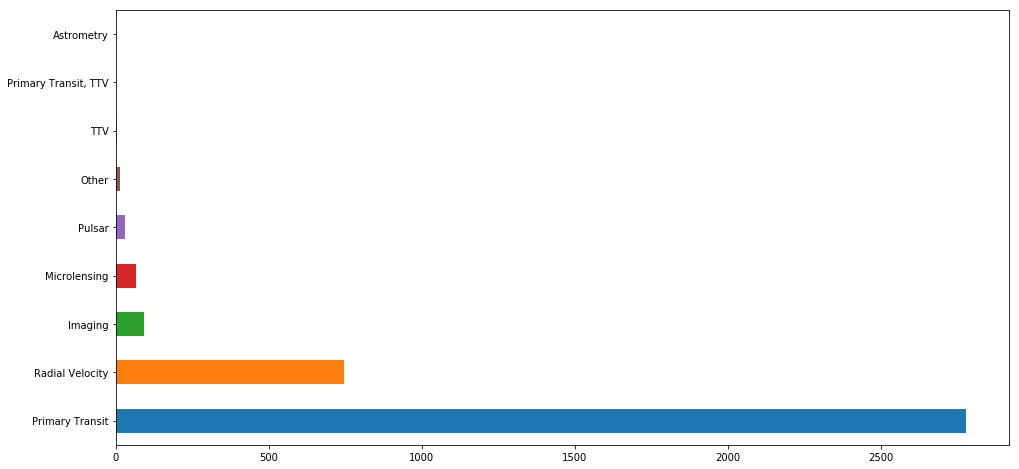

In [13]:
data_counts = df.detection_type.value_counts().plot(kind='barh',figsize=(16,8))

Plot the evolution of the number of detected exoplanets as a function of the years

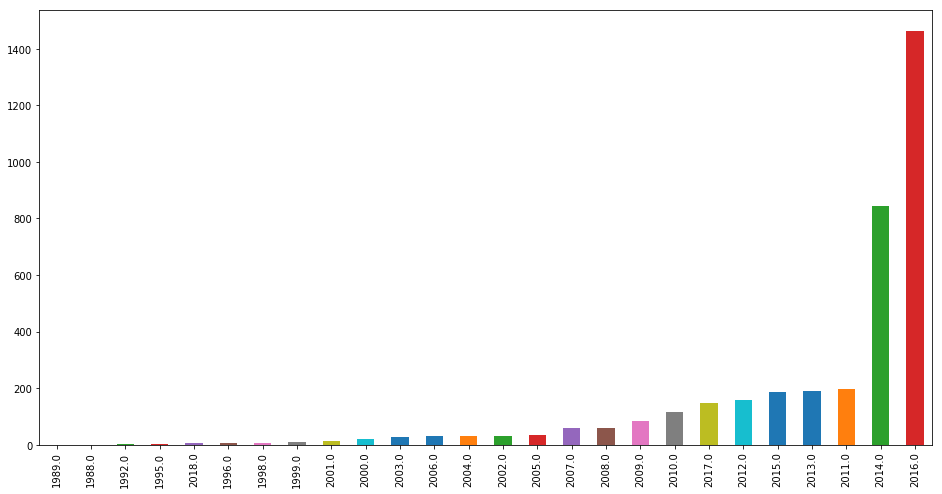

In [14]:
df.discovered.value_counts().sort_values().plot(kind='bar',figsize=(16,8))

## Machine Learning

1. Make a scatter plot of $log(\text{mass})$ vs $log(\text{orbital_period})$.    
    - replace `...` by your dataframe
        - it filters the `nan` values using the `.dropna()` function from pandas
        - it applies `log10` to the values

In [15]:
features = ['mass', 'orbital_period']
mass_op = df[features].dropna().apply(np.log10) 

2. How many clusters do you see in this plot?    
    - Use `sklearn.cluster.KMeans` to detect these clusters
        - replace `...` by the correct number
        - apply `.fit_predict` to the dataframe. The output are the `labels`.
    - Plot them using `display_clusters` passing as argument `mass_op.mass`, `mass_op.orbital_period`, `labels`

In [16]:
def display_clusters(x, y, labels, ax=None, **kwargs):
    ax = plt.gca() if ax is None else ax
    colors = mpl.cm.Set2(np.arange(len(set(labels))))
    
    if 's' not in kwargs:
        kwargs['s'] = 2
    
    ax.scatter(x, y, c = colors[labels], **kwargs)
    
    return ax

In [17]:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(mass_op)

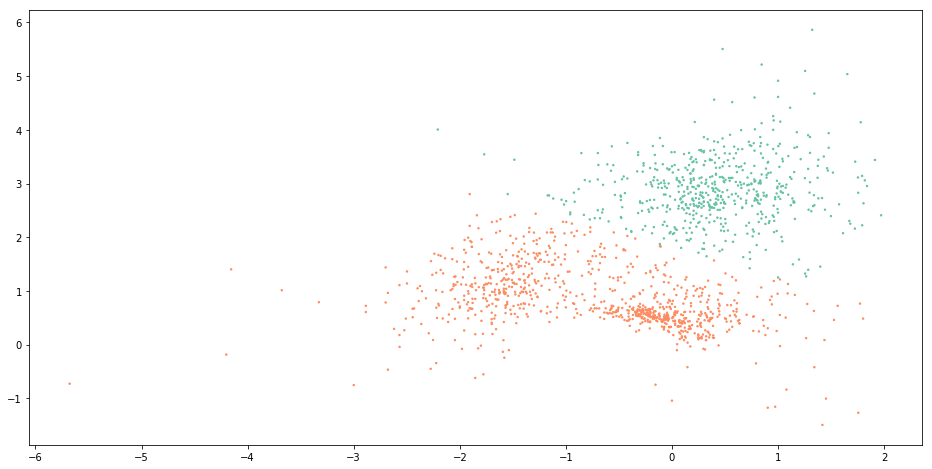

In [19]:
plt.figure(figsize=(16,8))
display_clusters(mass_op.mass,mass_op.orbital_period,labels)


3. KMeans on another dataset
    - Apply the KMeans clustering to the dataset below with 2 clusters    
    - Display the clusters (using the same function as previously)
    - Do you agree with the result ?

In [20]:
features = ['orbital_period', 'radius']
orb_rad = df[features].dropna().apply(np.log10)

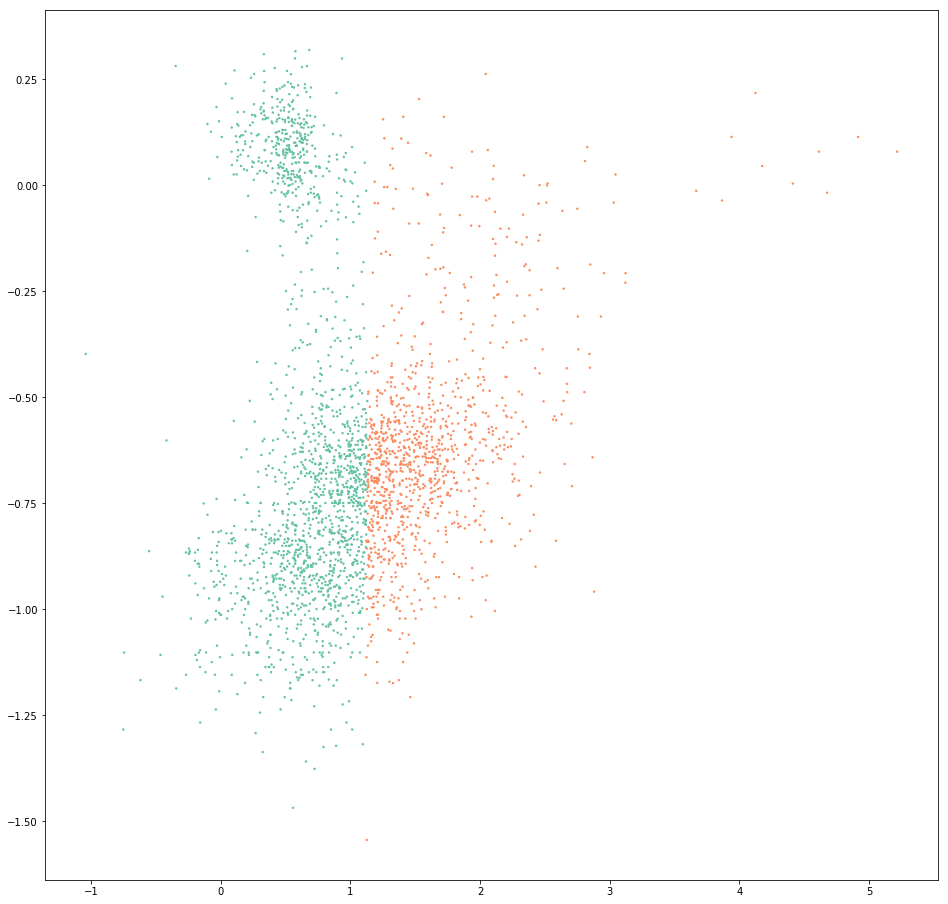

In [22]:
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(orb_rad)
plt.figure(figsize=(16,16))
display_clusters(orb_rad.orbital_period,orb_rad.radius,labels)

4. Gaussian mixture
    - Apply `sklearn.mixture.GaussianMixture` with 2 components to the `orb_per` dataset
    - Display the clusters.
    - Does the result look better to you? How do you explain the difference of result between these two algorithms?

In [23]:
from sklearn.mixture import GaussianMixture

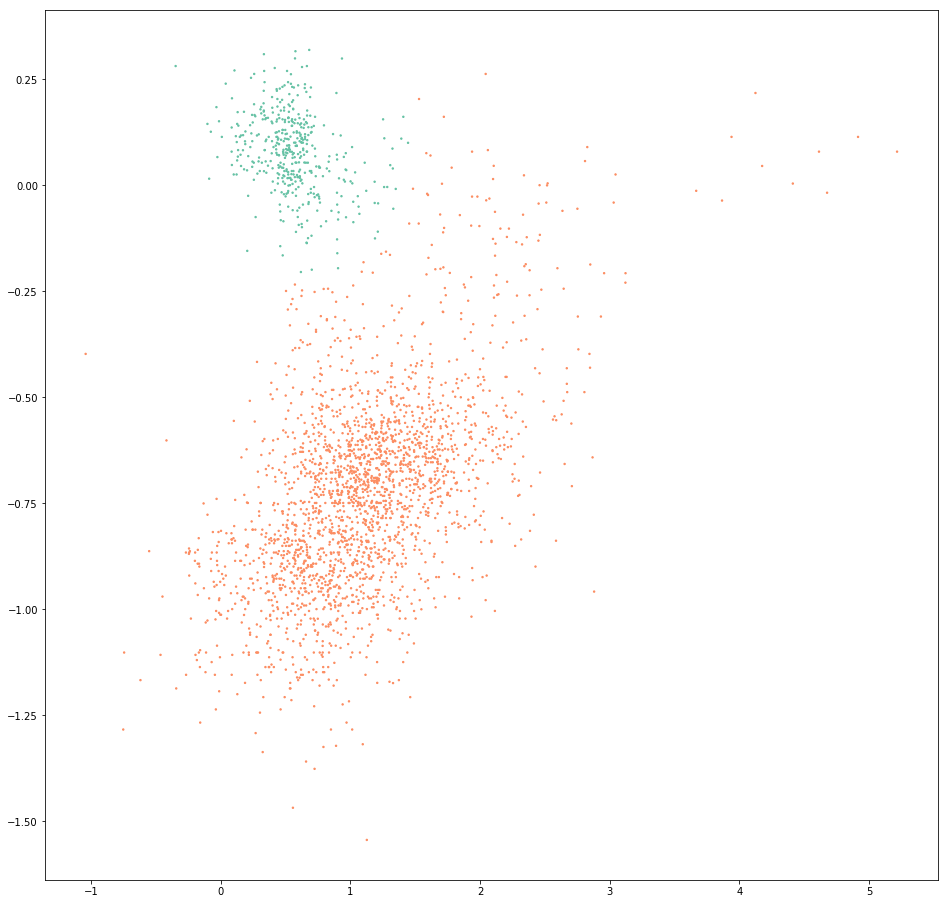

In [24]:
fit = GaussianMixture(n_components=2).fit(orb_rad)
plt.figure(figsize=(16,16))
labels = fit.fit_predict(orb_rad)
display_clusters(orb_rad.orbital_period,orb_rad.radius,labels)

    I think the Gaussian Mixture algorithm is better than KMeans. Because clustering function with Gaussian Mixture clusters better and seperates the cluster to make us understand better.

### Regression

1. By exploring the different columns, find and display a correlation between two of them

There is a strong correlation between `orbital_period` and `semi_major_axis`

### We will now try to train a model to predict the radius of a planet from other features

In [25]:
train_features = ['mass',
                  'orbital_period',
                  'eccentricity', 
                  'star_mass', 
                  'semi_major_axis']

predict_feature = ['radius']

all_features = train_features + predict_feature

rf_dataset = df[all_features].dropna()

1. Split the dataset into train and test datasets

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(rf_dataset, rf_dataset[predict_feature], test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((348, 6), (348, 1), (87, 6), (87, 1))

2. Train a model (`sklearn.linear_model.LinearRegression`) on the training dataset to predict `predict_feature`

In [28]:
from sklearn.linear_model import LinearRegression

In [62]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Assess the performance of the model using the `scoring` function.   
Does it look good to you ?

In [87]:
from sklearn.metrics import r2_score
def scoring(true_values, predicted_values, ax=None, **kwargs):
    ax = plt.gca() if ax is None else ax
    
    #ax.hist2d(true_values, predicted_values, **kwargs)
    ax.plot(true_values, true_values, color='black', lw=1)
    
    score = r2_score(true_values, predicted_values)
    ax.set_title("Score = {:.3f}".format(score))
    
    return ax


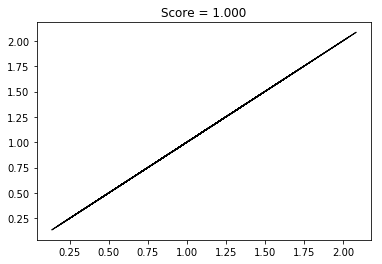

In [89]:
scoring(y_test.values,np.array(predictions))

# i tried at least 1000 different type of codes to run scoring but it didn't work. So I had to disable the hist2d function.

#### Open work
Apply what we have seen during the lectures to improve the model (try some parameters scaling, try another model, fine-tune the hyperparameters... )   
Conclude on your best scoring